In [295]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter1d

# from datetime import datetime


aerial
(256, 256, 3)
[ 1 23 41 21 13  3  1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
9
[ 1 10 12  3 12  0  3  3  1  0  0  0  0  0  2  0  0  0  0  0  1  0  0  0
  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

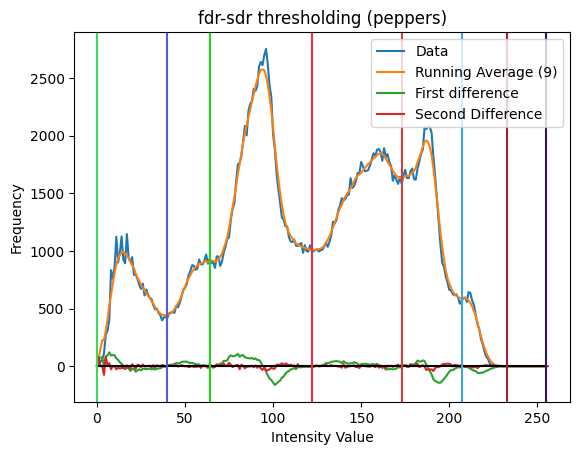

In [381]:
# Image list

# imlist = ["aerial.tiff"]
# imlist = ["baboon.tiff"]
# imlist = ["boat.tiff"]
# imlist = ["house.tiff"]
# imlist = ["jet.tiff"]
# imlist = ["lena.tiff"]
# imlist = ["moon.tiff"]
# imlist = ["peppers.tiff"]
imlist = ["aerial.tiff","baboon.tiff","boat.tiff","house.tiff","jet.tiff","lena.tiff","moon.tiff","peppers.tiff"]

# Calculate the running average
def running_average(data, window_size):
    if len(data) < window_size:
        raise ValueError("Window size cannot be larger than the data size.")
    
    # Use convolution for efficient calculation
    weights = np.repeat(1.0, window_size) / window_size
    unpadded_enveolope = np.convolve(data, weights, 'valid')
    # print(np.zeros(window_size))
    padded_enveolope = np.concatenate([np.linspace(0,unpadded_enveolope[0],window_size//2),unpadded_enveolope,np.linspace(unpadded_enveolope[-1],0,window_size//2)])
    return padded_enveolope

for imname in imlist:

    image = cv2.imread(f'./testimages/{imname}')
    imname = imname.split(".")[0]
    print(imname)

    pre_gray = image * np.array([ 0.114020904255103,0.587043074451121,0.298936021293775])
        
    gray = np.sum(pre_gray, -1)
    # gray = image[ :,0]
    print(np.shape(image))
    # gray = image
    freq, intensity = np.histogram(gray,range=(0,255),bins=255,density=False)
    
    
    temp_int_for_plot = intensity
    # after plotting adjust the size
    intensity = intensity[:-1]
    
    plt.close()
    plt.figure(f'{imname}_new')
    # plt.stairs(freq, temp_int_for_plot)
    # print(thresholds)
    
    plt.plot(freq, label='Data')
    
    temp_freq = freq
    firstDerivative = np.concatenate([temp_freq,np.zeros(1)]) - np.concatenate([np.zeros(1),temp_freq])
    
    secDerivative = np.concatenate([firstDerivative,np.zeros(1)]) - np.concatenate([np.zeros(1),firstDerivative])
        
    # detecting sign change from -ve to +ve
    def detect_signChange(fdr,sdr):
        arr = fdr
        # checking sign change by multiplying subsequent elements
        base_arr = np.concatenate([arr,np.zeros(1)])
        one_shifted_arr = np.concatenate([np.zeros(1),arr])
        
        out_arr = base_arr*one_shifted_arr
        change_arr = (out_arr <=0) # sign change occurs when product is -ve
        
        # intensities at which sign change occur
        change_pos = np.where(change_arr == True)[0]
        info_sdr = np.where(sdr >= 0)[0] # these are places where decond derivative is +ve
        
        # when both these condition are satisfied, we get locations of minimas
        # out_pos = change_pos
        out_pos = np.intersect1d( change_pos , info_sdr )
        dist_info = np.concatenate([out_pos,np.zeros(1)]) - np.concatenate([np.zeros(1),out_pos])
        bins = np.arange(0,256,1)
        # print(bins)
        print(np.histogram(dist_info,bins=bins)[0])
        magic_number = np.where(np.histogram(dist_info,bins=bins)[0] == 0)[0][2]
        # magic_number = np.int16(np.abs(magic_number*(1/1-(np.sum(np.abs(np.diff(fdr)))/255**2))))
        print(magic_number)
        return(out_pos,magic_number)
    
    n_ra = detect_signChange(firstDerivative,secDerivative)[1] # running avg to consider

    # freq = running_average(freq, n_ra)
    
    # polyorder=3
    # freq = savgol_filter(freq, n_ra, polyorder)
    
    freq = running_average(freq, n_ra)
    plt.plot(freq,label=f'Running Average ({n_ra})')
    
    firstDerivative = np.concatenate([freq,np.zeros(1)]) - np.concatenate([np.zeros(1),freq])
    firstDerivative = running_average(firstDerivative,n_ra1)
    
    secDerivative = np.concatenate([firstDerivative,np.zeros(1)]) - np.concatenate([np.zeros(1),firstDerivative])
    secDerivative = running_average(secDerivative,n_ra2)
        
    def separate_minimas_from_change(signChangeMat,minimumDistributionSpan):
        # if the sign change has occured too fast that is we are in flat fluctuations regions then remove this region
        dist_mat = np.concatenate([signChangeMat,np.zeros(1)]) - np.concatenate([np.zeros(1),signChangeMat])

        outMat = signChangeMat[np.where(dist_mat >= minimumDistributionSpan)[0]]
        
        outMat = np.concatenate([np.array([0]),outMat,np.array([255])])
        
        # print(outMat)
        return outMat
        
        
    thresholds = separate_minimas_from_change(detect_signChange(firstDerivative,secDerivative)[0],min_distSpan)
    
        
    plt.plot(firstDerivative,label='First difference')
    plt.plot(secDerivative,label='Second Difference')
    plt.legend()
    plt.plot(np.zeros_like(firstDerivative),color="black")
    
    def generate_random_hex_color():
        """Generates a random hex color code."""
        hex_color = '#'
        for _ in range(6):
            hex_color += random.choice('0123456789abcdef')
        return hex_color    

    handles = []


    for index,thresh in enumerate(thresholds):
        color = generate_random_hex_color()
        plt.axvline(x=thresh,label=f'minima {index+1} ', linestyle='-',color=color)
        handles.append(plt.Line2D([0], [0], color=color, lw=2, label=f'minima {index + 1}')) 
    plt.xlabel("Intensity Value")
    plt.ylabel("Frequency")
    # plt.legend(handles=handles)
    plt.title(f"fdr-sdr thresholding ({imname})")
    plt.savefig(f"./test_results/{imname}.pdf")
    plt.savefig(f"./test_results/{imname}.png",dpi=200)
    # plt.show()


aerial


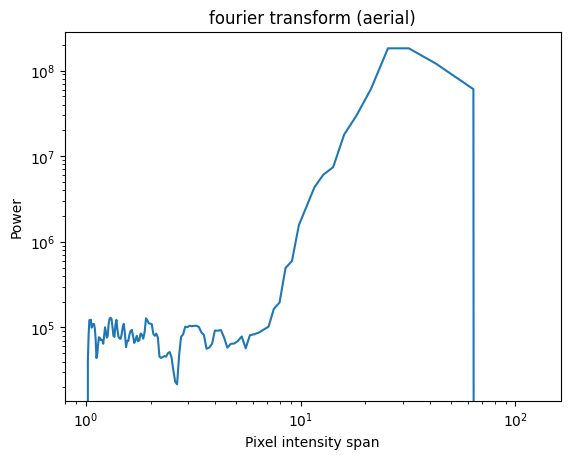

baboon


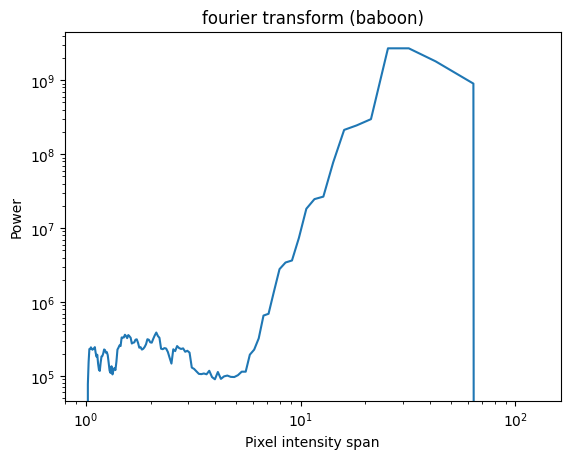

boat


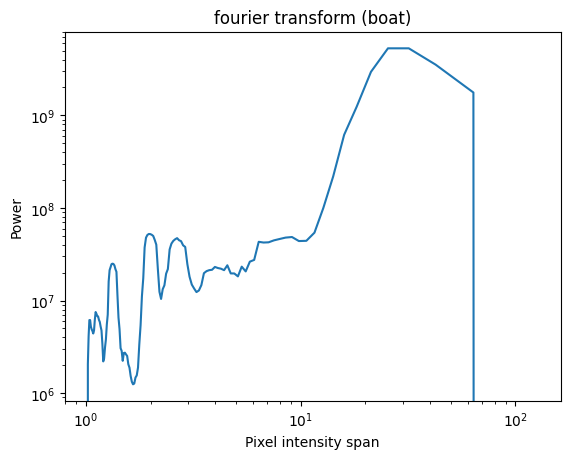

house


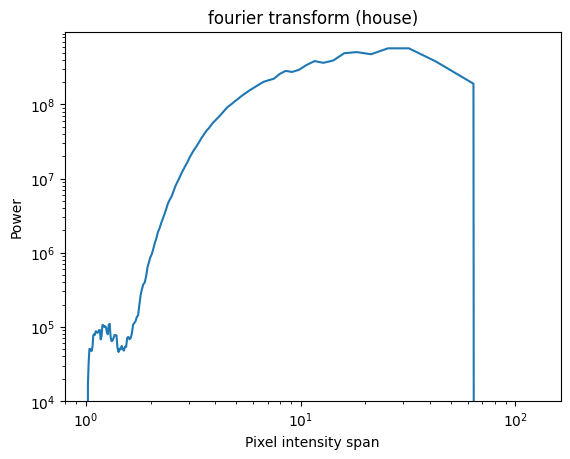

jet


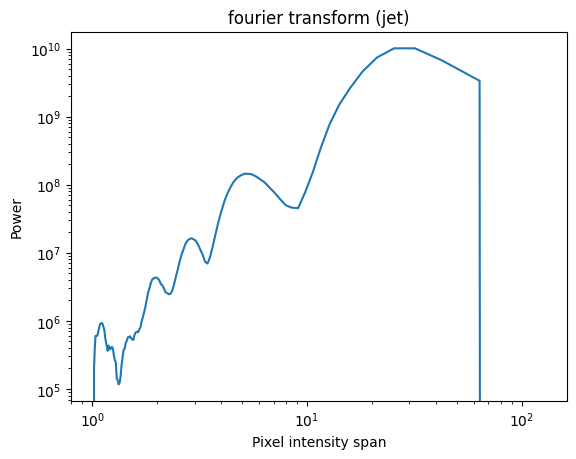

lena


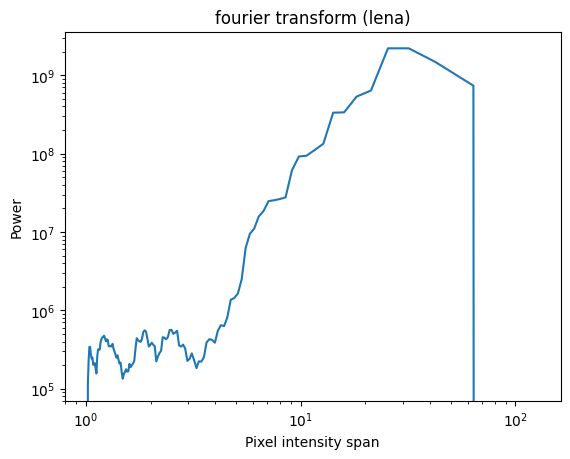

moon


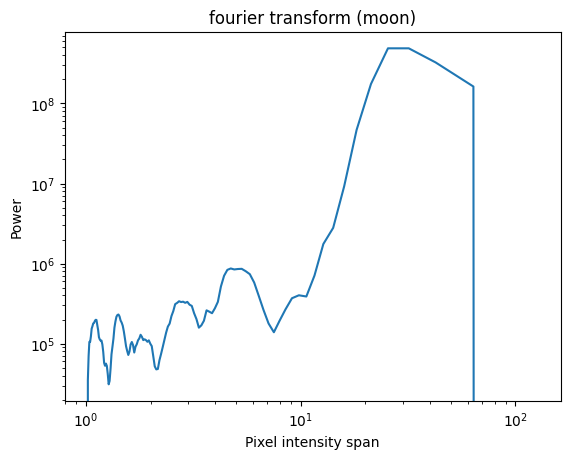

peppers


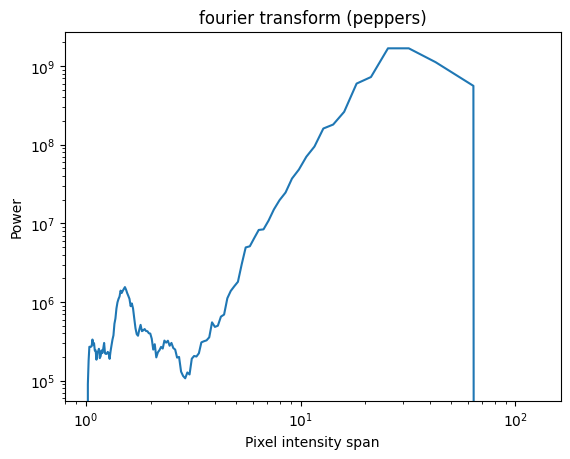

In [283]:
for imname in imlist:
    
    image = cv2.imread(f'./testimages/{imname}')
    imname = imname.split(".")[0]
    print(imname)

    pre_gray = image * np.array([ 0.114020904255103,0.587043074451121,0.298936021293775])
    
    gray = np.sum(pre_gray, -1)
    freq, intensity = np.histogram(gray,range=(0,255),bins=255,density=False)
    
        
    # fft 
    plt.close()
    plt.figure(f'{imname}_fft')
    fs = 2
    T = 1/fs   # Sampling interval
    n = len(freq)  # total number of samples
    
    freq = freq
    n_ra = 1
    freq = running_average(freq,n_ra)
    # freq = np.concatenate([freq,np.zeros(1)]) - np.concatenate([np.zeros(1),freq])
    # n_ra = 4
    # freq = running_average(freq,n_ra)
    # freq = np.concatenate([freq,np.zeros(1)]) - np.concatenate([np.zeros(1),freq])

    # compute the fft of the standardized_cumsum_signal
    signal_fft = np.fft.fft(freq)[1:n//2]
    # frequencies corresponding to the fft components
    frequencies = np.fft.fftfreq(n, T)[1:n//2]
    # print()    plt.xaxis_type="log", # This is the key line for a log x-axis
    ra = 9
    plt.plot(1/frequencies,running_average(np.abs(signal_fft)**2,ra))
    plt.ylabel("Power")
    plt.xlabel("Pixel intensity span")
    plt.xscale('log')
    plt.yscale('log')
    # plt.legend(handles=handles)
    plt.title(f"fourier transform ({imname})")
    plt.savefig(f"./test_results/{imname}_fft.pdf")
    # plt.savefig(f"./test_results/{imname}.png")
    plt.show()
